<a href="https://colab.research.google.com/github/alma-f/surgical-tools-detection/blob/master/SurgicalToolsModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 1
except Exception:
  pass

import tensorflow as tf

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import os, cv2

In [0]:
  import numpy as np


In [0]:
import matplotlib.pyplot as plt

In [0]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [0]:
from keras import backend as K

In [0]:
K.common.set_image_dim_ordering('tf')
#K.common.set_image_dim_ordering('th')

In [0]:
from keras.utils import np_utils

In [0]:
from keras.models import Sequential

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam

In [0]:
from keras.models import Sequential

In [21]:
! git clone https://github.com/alma-f/ml-dataset.git

Cloning into 'ml-dataset'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 3053 (delta 3), reused 13 (delta 2), pack-reused 3039
Receiving objects: 100% (3053/3053), 181.65 MiB | 12.63 MiB/s, done.
Resolving deltas: 100% (8/8), done.


In [46]:
print(os.listdir('ml-dataset'))

['.git', 'README.md', 'Images', 'Test image']


In [0]:
data_path = 'ml-dataset/Images'
data_dir_list = os.listdir(data_path)

In [0]:
img_rows=128
img_cols=128
num_channel=1
num_epoch=25


In [0]:
num_classes = 4

In [0]:
labels_name={'Curved Mayo Scissor':0,'Scalpel':1, 'Straight Dissection Clamp':2, 'Straight Mayo Scissor':3}

In [0]:
img_data_list=[]
labels_list = []

In [64]:
for dataset in data_dir_list:
  img_list=os.listdir(data_path+'/'+ dataset)
  print ('Loading the images of dataset-'+'{}\n'.format(dataset))
  label = labels_name[dataset]
  for img in img_list:
    input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
    input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
    input_img_resize=cv2.resize(input_img,(128,128))
    img_data_list.append(input_img_resize)
    labels_list.append(label)

Loading the images of dataset-Curved Mayo Scissor

Loading the images of dataset-Straight Dissection Clamp

Loading the images of dataset-Scalpel

Loading the images of dataset-Straight Mayo Scissor



In [74]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

(2010, 128, 128)


In [75]:
labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

(array([0, 1, 2, 3]), array([550, 550, 460, 450]))


In [0]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [77]:
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape) 
		
else:
	if K.common.image_dim_ordering()=='th':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)
		

(2010, 128, 128, 1)


In [0]:
from sklearn import preprocessing

In [0]:
	def image_to_feature_vector(image, size=(128, 128)):
		# resize the image to a fixed size, then flatten the image into
		# a list of raw pixel intensities
		return cv2.resize(image, size).flatten()


In [80]:
	img_data_list=[]
	for dataset in data_dir_list:
		img_list=os.listdir(data_path+'/'+ dataset)
		print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
		for img in img_list:
			input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img ) #read the image
			input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY) #convert it into gray
			input_img_flatten=image_to_feature_vector(input_img,(128,128)) #resize
			img_data_list.append(input_img_flatten) #append it to the img_data_list

Loaded the images of dataset-Curved Mayo Scissor

Loaded the images of dataset-Straight Dissection Clamp

Loaded the images of dataset-Scalpel

Loaded the images of dataset-Straight Mayo Scissor



In [81]:
img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
print (img_data.shape)
img_data_scaled = preprocessing.scale(img_data)
print (img_data_scaled.shape)

(2010, 16384)
(2010, 16384)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [82]:
print (np.mean(img_data_scaled))
print (np.std(img_data_scaled))

-4.280192e-08
0.9999992


In [83]:
print (img_data_scaled.mean(axis=0))
print (img_data_scaled.std(axis=0))

[-6.1724911e-08  1.2451737e-07 -4.0697222e-07 ... -1.2583698e-07
 -1.0989792e-07 -2.4835268e-08]
[0.99999607 1.0000008  0.99999845 ... 0.9999967  1.0000005  1.0000006 ]


In [84]:
if K.common.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)
	
	
if K.common.image_dim_ordering()=='th':
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],num_channel,img_rows,img_cols)
		print (img_data_scaled.shape)
		
else:
		img_data_scaled=img_data_scaled.reshape(img_data.shape[0],img_rows,img_cols,num_channel)
		print (img_data_scaled.shape)


(2010, 128, 128, 1)
(2010, 128, 128, 1)


In [0]:
img_data=img_data_scaled

# Defining the model

In [0]:
input_shape=img_data_scaled[0].shape

In [0]:
model = Sequential()

In [89]:
model.add(Convolution2D(32, 3,3,border_mode='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(Convolution2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(128, 128,..., padding="same")`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
model.add(Convolution2D(64, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  """Entry point for launching an IPython kernel.


In [0]:
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [93]:
#Model configuration
model.summary()
model.get_config()
model.layers[0].get_config()
model.layers[0].input_shape			
model.layers[0].output_shape			
model.layers[0].get_weights()
np.shape(model.layers[0].get_weights()[0])
model.layers[0].trainable

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
activation_1 (Activation)    (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 61, 61, 64)       

True

Training the model

In [0]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
#X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)

In [0]:
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

In [98]:
hist = model.fit(X_train, y_train, batch_size=32, nb_epoch=num_epoch, verbose=1, validation_data=(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 1608 samples, validate on 402 samples
Epoch 1/25
1608/1608 [==============================] - 91s 57ms/step - loss: 0.2637 - accuracy: 0.8930 - val_loss: 0.4280 - val_accuracy: 0.8532
Epoch 2/25
1608/1608 [==============================] - 91s 57ms/step - loss: 0.2684 - accuracy: 0.8812 - val_loss: 0.4169 - val_accuracy: 0.8483
Epoch 3/25
1608/1608 [==============================] - 96s 60ms/step - loss: 0.2514 - accuracy: 0.8924 - val_loss: 0.4155 - val_accuracy: 0.8557
Epoch 4/25
1608/1608 [==============================] - 92s 57ms/step - loss: 0.2254 - accuracy: 0.9011 - val_loss: 0.4522 - val_accuracy: 0.8557
Epoch 5/25
1608/1608 [==============================] - 92s 57ms/step - loss: 0.2024 - accuracy: 0.9160 - val_loss: 0.4850 - val_accuracy: 0.8682
Epoch 6/25
1608/1608 [==============================] - 92s 58ms/step - loss: 0.1976 - accuracy: 0.9167 - val_loss: 0.4858 - val_accuracy: 0.8582
Epoch 7/25
1608/1608 [==============================] - 92s 57ms/step - loss:

Accuracy and loss visualization

In [99]:
for key in hist.history.keys():
    print(key)

val_loss
val_accuracy
loss
accuracy


In [0]:
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(num_epoch)

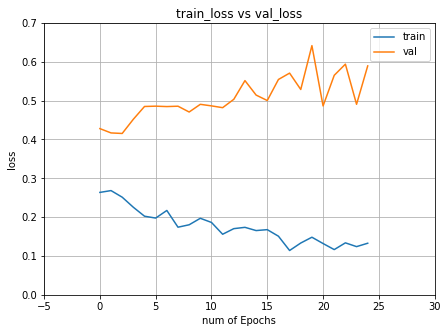

In [101]:
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])

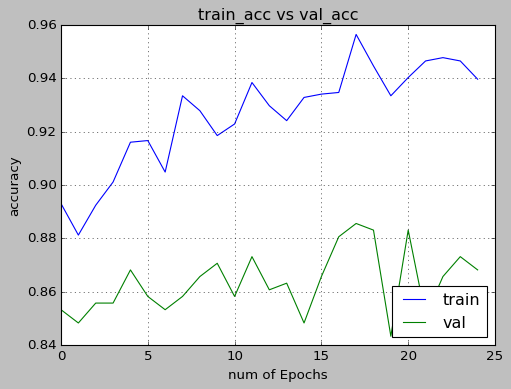

In [102]:
plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

Model Evaluation


In [104]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.5895045331461513
Test accuracy: 0.8681591749191284


In [105]:
print('Test loss:', score[0])

Test loss: 0.5895045331461513


In [106]:
print('Test accuracy:', score[1])

Test accuracy: 0.8681591749191284


In [107]:
test_image = X_test[0:1]
print (test_image.shape)

(1, 128, 128, 1)


In [108]:
print(model.predict(test_image))
print(model.predict_classes(test_image))
print(y_test[0:1])

[[1.3632190e-15 2.5472622e-25 1.0000000e+00 5.5574380e-23]]
[2]
[[0. 0. 1. 0.]]


Testing a new image

In [109]:
test_image = cv2.imread('ml-dataset/Test image/bisturi40.jpg')
test_image=cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY)
test_image=cv2.resize(test_image,(128,128))
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
#test_image = test_image.reshape((128, 128,1))
print (test_image.shape)

(128, 128)


In [113]:
if num_channel==1:
	if K.common.image_dim_ordering()=='th':
		test_image= np.expand_dims(test_image, axis=0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=2) 
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
		
else:
	if K.common.image_dim_ordering()=='th':
		test_image=np.rollaxis(test_image,2,0)
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)
	else:
		test_image= np.expand_dims(test_image, axis=0)
		print (test_image.shape)

(1, 128, 128, 1)


Test image prediction

In [114]:
print((model.predict(test_image)))
print(model.predict_classes(test_image))

[[2.8810869e-09 1.0000000e+00 1.1323306e-17 1.1242598e-18]]
[1]


In [115]:
print(model.predict_classes(test_image))

[1]


Saving and loading model and weights

In [0]:
from keras.models import model_from_json
from keras.models import load_model

In [0]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [118]:
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


In [120]:
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [0]:
model.save('model.hdf5')
loaded_model=load_model('model.hdf5')